<h1><center>Laboratorio 2: Imagenes 📷</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Catalina Contreras
- Nombre de alumno 2: Santiago Valdivieso


### **Link de repositorio de GitHub:** `http://....`

### Reglas:

- Fecha de entrega: 24 de septiembre (atrasos hasta el 27 de septiembre, 1 pto de descuento por día)
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.


### Temas a tratar:

- Programación Orientada a Objetos.
- Programación Funcional.
- `Numpy` para manejo de datos en arreglos/tensores.




### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado **sin el uso indiscriminado de iteradores nativos de python (aka "for", "while")**. La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos.

El lab estará basado en algunos conceptos básicos de procesamiento de imágenes, por lo que te iremos guiando, paso a paso por cada uno de los tópicos a desarrollar.

## Descripción del laboratorio.

En Data Science son múltiples las aplicaciones que exigen el uso exhaustivo de listas de varias dimensiones. Estas entidad reciben formalmente el nombre de **arreglos o tensores**.

Pensemos en que queremos almacenar objetos en un casillero común y corriente: podemos pensar que este puede ser representado por una matriz de dos dimensiones: alto y ancho. ¿Que sucederá si este casillero nos queda pequeño y queremos guardar más información del mismo tipo?: La solución es simple es agregar otro casillero. Esto puede ser pensado como el aumento de la dimensión de nuestro objeto, pasando a ser ahora (alto, ancho, id casillero). Esto no es otra cosa que un **tensor de 3 dimensiones**.

<br>
<center>
<img src="https://drive.google.com/uc?export=view&id=1tb7popMBUSSj4YzD-Ypytoo6n7PbXzuJ" width=300 height=300 />
</center>
<br>

### ¿Bueno y que tiene que ver todo esto con las imágenes?

Una imagen es una representación visual de una matriz que contiene de números que describen intensidades de color (llamados píxeles). Esto visto desde la perspectiva de una imagen en blanco y negro, vendria siendo una matriz que reune las diferentes intensidades de los pixeles desde 0 a 255.

<br>
<center>
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png" width=500 height=500 alt="Representación de una imagen" />
</center>
<br>

Cuando las imágenes poseen colores, las imágenes vendrían siendo "sin querer queriendo", una bella representación de lo que es un tensor: estas pueden ser representadas por un tensor de 3 dimensiones que les dan el *ancho, alto y el canal*, en donde son alojados los colores de la imagen.

<br>
<center>
<img src="https://miro.medium.com/max/2146/1*icINeO4H7UKe3NlU1fXqlA.jpeg" width=300 height=300 alt="Representación de una imagen" />
</center>
<br>

Como pueden ver, la imagen puede ser interpretada como un tensor de tres dimensiones(un ancho, un alto y la intensidad de cada color) en el a cada posición $(i,j)$ de la imagen, le asociaremos 3 intensidades de colores RGB (Rojo, Verde y Azul). Estas intensidades irán desde el $0$ al $255$. La combinación de estos 3 canales nos permitirá representar gran parte de los colores que encontramos en la naturaleza.

**Instalar paquetes: Si están usando conda**


In [1]:
import sys

!conda install --yes --prefix {sys.prefix} pillow plotly imageio

Solving environment: ...working... done

# All requested packages already installed.



**Instalar paquetes: Si están usando pip**


In [2]:
import sys

!{sys.executable} -m pip install pillow plotly imageio

**En caso de trabajar con colab:**

In [ ]:
try:
    from google.colab import drive

    drive.mount("/content/drive")
    path = "/content/drive/My Drive/CuerpoDocente/Laboratorios/Lab1-Numpy/"
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab



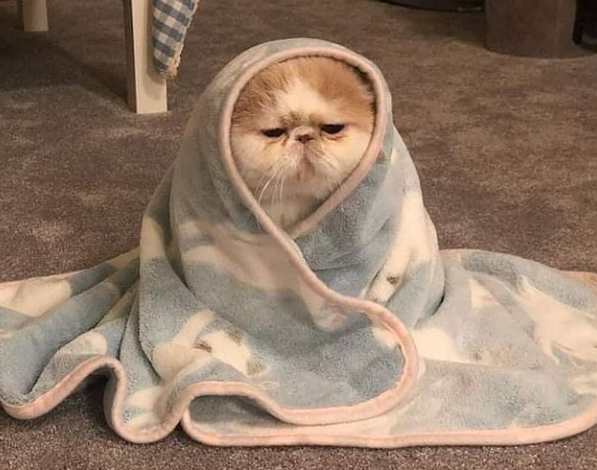

In [164]:
# En este lab usaremos adicionalmente pillow, una estupenda librería para manejar imágenes.
# https://pillow.readthedocs.io/en/stable/
from PIL import Image, ImageOps
import numpy as np
import plotly.express as px

foto = np.array(Image.open("./images_lab/cobija.PNG").convert("RGB"))

# Solo para ejemplificar, usaremos plotly. 
# Pero en el restro del laboratorio, matplotlib debe ser usado

fig = px.imshow(foto)
fig.show()

In [31]:
foto2

array([[[209, 233, 254],
        [207, 230, 252],
        [200, 224, 245],
        ...,
        [245, 248, 249],
        [245, 249, 250],
        [244, 248, 248]],

       [[189, 210, 228],
        [186, 207, 225],
        [184, 205, 223],
        ...,
        [242, 246, 247],
        [243, 247, 247],
        [243, 247, 248]],

       [[180, 199, 214],
        [178, 197, 212],
        [178, 197, 212],
        ...,
        [240, 244, 245],
        [241, 245, 245],
        [242, 246, 246]],

       ...,

       [[129, 160, 176],
        [122, 154, 169],
        [124, 155, 171],
        ...,
        [128, 159, 178],
        [120, 151, 170],
        [105, 136, 156]],

       [[130, 161, 177],
        [123, 154, 169],
        [128, 160, 175],
        ...,
        [101, 132, 152],
        [ 95, 126, 145],
        [106, 137, 157]],

       [[136, 167, 183],
        [117, 149, 164],
        [116, 147, 162],
        ...,
        [106, 137, 157],
        [105, 135, 155],
        [114, 145, 164]]

Luego, llamando la variable donde alojamos el array podemos ver los valores que componen a esta imagen.

In [96]:
print(f'Número de dimensiones: {foto.ndim}')
print(f'Número de elementos por dimensión: {foto.shape}')

Número de dimensiones: 3
Número de elementos por dimensión: (470, 597, 3)


Finalmente visualizamos de forma aleatoria los pixeles de cada canal para mostrar sus intensidades.

In [8]:
print(f"Ejemplo de pixel (10, 200) en el canal 0 - Red: {foto[10, 200, 0]}")
print(f"Ejemplo de pixel (10, 200) en el canal 1- Green: {foto[10, 200, 1]}")
print(f"Ejemplo de pixel (10, 200) en el canal 2- Blue: {foto[10, 200, 2]}")

Ejemplo de pixel (10, 200) en el canal 0 - Red: 97
Ejemplo de pixel (10, 200) en el canal 1- Green: 70
Ejemplo de pixel (10, 200) en el canal 2- Blue: 48


Con lo anterior, suponiendo que la imagen del "gatito" tiene una altura igual a 600 y un ancho de 400, el tensor $G$ que representa a la imagen vendrá dado por $G[600, 400, 3]$. 

### Videos

Luego, si queremos complejizar aún mas esto y queremos tener tensores que agrupen un conjunto de imágenes (de igual tamaño) tendremos lo siguiente:


<br>
<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRk4BWrH_xi_blsx9Y32OTT8k80vI90udG-Yg&usqp=CAU" width=300 height=300 alt="Representación de una imagen" />
</center>
<br>

Este conjunto de imágenes nos generará la necesidad de producir una nueva dimensión, esto producto que las dimensiones son los espacios donde alojamos la información, por esto al conjunto de imágenes le agregaremos una dimensión que identifica cada una de las imágenes del conjunto, quedando representada por el tensor $G[0:n_d, 600, 400, 3]$. Por lo general, cuando tenemos imágenes con dimensionalidad 4 es porque se tratan de videos, o sea una secuencia de imágenes; el caso se complejiza aún más cuando agregamos sonido y esto se va a las pailas.

<blockquote>Dato:
La representación que posee cada una de las dimensiones puede cambiar dependiendo de la librería utilizada, en pytorch por ejemplo las dimensiones de una imagen vienen dadas por [batch, canales, alto, ancho] y no [batch, alto, ancho, canales] como en numpy.
</blockquote>


### ¿Ya, pero esto tiene aplicaciones más allá de guardar información en casilleros?

Para el caso de imágenes podemos encontrar múltiples aplicaciones con la manipulación de los tensores y operando matemáticamente con ellos. Algunas de las aplicaciones más conocidas (y que aplicaremos) son las siguientes:

- **Obtener el negativo de una imagen**: Consiste en obtener el color complementario de una imagen, para esto debemos restar la imagen con la máxima intensidad que podemos encontrar en una imagen (o sea 255).
    
    
- **Pasar a escala de grises una imagen**: Los valores RGB se convierten a escala de grises mediante la fórmula NTSC: 

    $$ imagen\_gris = 0.299 * Rojo + 0.587 * Verde + 0.114 * Azul $$
    
    Esta fórmula representa la percepción relativa de la persona promedio del brillo de la luz roja, verde y azul.
    
    
- **Mejora de contraste**: Son múltiples las técnicas que nos permiten mejorar el contraste de una imagen, pero, una técnica simple para modificar los contrastes consta en obtener un factor de corrección llamado F en base al contraste deseado (C). Luego, es aplicado en la diferencia entre la imagen y 128. De esta forma obtenemos R, que es la imagen con la mejora de contraste deseada.

    $$ F=259*(C+255)/(255*(259-C)) $$
    $$ R=F*(img-128)+128 $$
  
  
- **Convolución**: Consiste en recorrer una imagen por cada uno de sus canales utilizando una matriz que lleva por nombre Kernel. El kernel, examinará los conjuntos de pixeles que recorre, aplicando una multiplicación de los valores circundantes ,y sumando todos los valores generados de este producto para generar un nuevo pixel en el tensor de salida.

![conv](https://media3.giphy.com/media/i4NjAwytgIRDW/giphy.gif "miracomorecorre")

---

# Desarrollo

En base a lo explicado y visto en clases, a continuación, deben construir cada uno de los programas solicitados en las actividades señaladas más abajo. Estás, deben ser desarrollados de forma grupal (**2 personas por grupo**) y, la solución no debe ser compartida con personas externas al grupo; si se detecta que dos grupos entregan el mismo trabajo, será considerado plagio y se tomaran medidas al respecto.

## 2. Creación de Clases y Funciones.

#### Importamos librerias utiles 😸

In [166]:
# Libreria Core del lab.
import numpy as np
from pathlib import Path

# Librerias para graficar
import matplotlib.pyplot as plt 

# Nota: Utilizar solo matplot para este lab. NO USAR PLOTLY, 
# ya que tiene problemas de compatibilidad con imagenes

# Funcionalidades dependientes del Sistema Operativo.
import os

# Librerias utiles para cargar y generar Gifs
import imageio
from PIL import Image
from scipy.signal import convolve2d

### 2.1. Carga de imagenes y visualización

Descomprima el archivo "images_lab.zip" en algún directorio de su computador o plataforma, observen las imágenes y clasifíquenlas a su gusto, para luego en un diccionario cargar y agrupar las diferentes imágenes (no cree mas de tres llaves).

Hecho esto, visualize dos imágenes y verifique la dimensionalidad de estas imágenes con el comando *.shape*. Comente la dimensionalidad de las imágenes.

### Carga de imagenes en diccionarios

Las siguientes celdas de código le permitirá cargar las imágenes que utilizaremos durante este laboratorio.

La primera celda implementa la función `from_jpg`, la cual, dado una ruta, carga una imágen:


In [167]:
def from_jpg(path):
    try:
        ruta = Path(path)
        image = np.array(Image.open(ruta))
        return image
    except Exception as e:
        print(f"Error: {repr(e)}. Path: {path}")
        return None

La segunda celda carga las imágenes y las guarda en un diccionario. 

In [168]:
images = {
    "gatitos": [
        from_jpg("./images_lab/gato1.jpg"),
        from_jpg("./images_lab/gato2.jpg"),
        from_jpg("./images_lab/gato4.jpg"),
    ],
    "Personas": [
        from_jpg("./images_lab/personas.jpg"),
        from_jpg("./images_lab/gurus.jpg"),
    ],
    "Monos_chinos": [from_jpg("./images_lab/monitos.jpg")],
}

### Plot de imagenes
A continuación, utilice la función `def show(imagen)` (definida más abajo) para explorar las imágenes cargadas en la celda anterior.

**Respuesta Esperada**:

In [12]:
def show(imagen):
    plt.imshow(imagen)
    plt.show()
    x, y, z = imagen.shape
    print(f'Dimensiones de la imagen: {x}x{y} (Alto x Ancho)')

In [13]:
a=(images['gatitos'])[0]+50

In [14]:
a.shape

(869, 750, 3)

In [15]:
images['gatitos'][0].shape

(869, 750, 3)

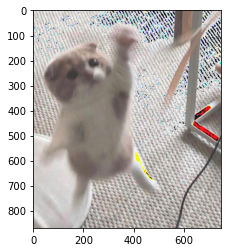

Dimensiones de la imagen: 869x750 (Alto x Ancho)


In [16]:
show(a)


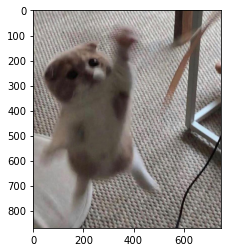

Dimensiones de la imagen: 869x750 (Alto x Ancho)


In [17]:
show(images['gatitos'][0])
# usar show para mostrar las otras imágenes...

### 2.2 Clase imagenes [3.0 puntos].

Ahora que sabemos cómo plotear y cargar una imagen, cree una clase llamada "Imagen" la que cumpla las siguientes características:

- [X] Un constructor que tome como argumento una imagen y que lo guarde como un atributo. `__init__` debe comprobar que la imagen es un arreglo de numpy (con `isinstance`) y adicionalmente que este tiene 3 dimensiones. En caso contrario, debe levantar excepciones con mensajes correspondientes al error detectado (ustedes definen el mensaje). 
- [ ] Implemente el método `show()` que muestre la imagen usando la función `plt.show()`.
- [ ] Implemente el método `info()` que retorna un string con las dimensiones de la imagen.
- [ ] Sobrecargue el método mágico `__mul__`, `__add__` y `__sub__` para realizar operaciones matemáticas entre el objeto y arrays, int o floats. Realice la función pensando que la operación se puede aplicar tanto para izquierda y derecha. Como estamos trabajando con imágenes los outputs deben ser enteros, por esto se le aconseja utilizar `.astype(int)` para transformar los arrays de salida a un formato legible por matplotlib.
- [ ] Es importante que para las operaciones `__add__` y `__sub__` implementen una saturación de las imágenes. Es decir, la suma o resta deben dar como valor máximo 255 y/o como valor mínimos mayores o iguales a 0.
- [ ] Para el caso de `__mul__` deben implementar un método que nos permita saturar las imágenes (es decir que los valores del array no sobrepasen 255) y también no nos permita obtener valores inferiores a cero.
 
Implementadas los métodos, compruebe que la funcionalidad es la correcta mediante la ejecución de los asserts incluidos un par de celdas más abajo.

> **Notas:** 
- Pueden reutilizar el código implementado en las celdas anteriores para implementar los métodos `show` e `info` . Sin embargo, No invoquen directamente esas funciones.
- La idea es que la imagen contenida en la clase sea inmutable, por ende, todos los metodos que modifiquen la imagen contenida en el objeto deberan retornar un nuevo objeto de la clase `Imagen` que contenga la imagen modificada.

In [74]:
class Imagen:
    """Clase contenedora de imágenes"""
    
    def __init__(self, img):
        if isinstance(img, np.ndarray):
            if img.ndim != 3:
                raise ("El argumento debe ser un arreglo de numpy de solo 3 dimensiones")
            if img.shape[-1] != 3:
                raise (
                    "El argumento debe ser un arreglo de numpy de solo 3 dimensiones "
                    "tal que la última dimensión solo tiene 3 canales"
                )
            self.data = img
        else:
            raise TypeError(
                "Debes entregar un arreglo de numpy como argumento del constructor de "
                "Imagen"
            )

    def show(self):
        """Muestra la imágen contenida en la propiedad imagen usando plotly.
        Lo mismo que la función mostrar_imagen.
        """
        plt.imshow(self.data)
        plt.show()

    def imagen(self):
        return self.data

    def info(self):
        """ Imprime las características de la imagen cargada: Alto y ancho.
        """
        x, y, z = self.data.shape
        print('Características de la imagen cargada:')
        print(f'Alto: {y}')
        print(f'Ancho: {x}')
        print(f'dim: {z}')

    def __add__(self, other):
        """Redefine la operación + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Sumar y luego que en cada pixel mayor a 255 sea asignado el máximo.
        # Ver los tests para mas información.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        a = (self.data + other)
        a[a>255]=255
        a[a<0]=0
        return Imagen(a.astype(int))

        
    def __radd__(self, other):
        """Operación conmutativa de __add__.

        Hint: debería llamar a __add__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        return self + other

    def __sub__(self, other):
        """Redefine la operación + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Restar y luego que en cada pixel mayor a 255 sea asignado el máximo.
        # Ver los tests para mas información.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        b = (self.data.astype(np.float16) - other)
        b[b>255]=255
        b[b<0]=0
        return Imagen(b.astype(int))

    def __rsub__(self, other):
        """Operación conmutativa de __sub__.

        Hint: debería llamar a __sub__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        b = (other - self.data.astype(np.float16))
        b[b>255]=255
        b[b<0]=0
        return Imagen(b.astype(int))

    def __mul__(self, other):
        """Redefine la operación + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Sumar y luego que en cada pixel mayor a 255 sea asignado el máximo y 
        # cada valor inferior a 0 debe ser 0.
        # Ver los tests para mas información.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        b = (self.data.astype(np.float16) * other)
        b[b>255]=255
        b[b<0]=0
        return Imagen(b.astype(int))

    def __rmul__(self, other):
        """Operación conmutativa de __mul__.

        Hint: debería llamar a __mul__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        return self * other

**Resultados esperados:**

In [141]:
gatito = Imagen(images["gatitos"][1])
gurus = Imagen(images["Personas"][1])

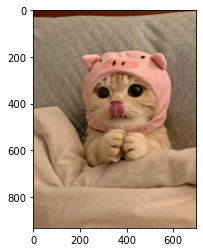

Características de la imagen cargada:
Alto: 700
Ancho: 933
dim: 3


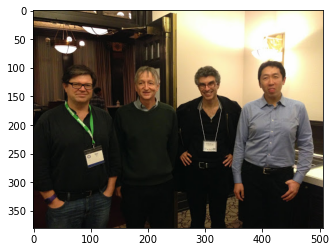

Características de la imagen cargada:
Alto: 506
Ancho: 380
dim: 3


In [76]:
# Test show e info.
gatito.show()
gatito.info()

gurus.show()
gurus.info()

In [77]:
# Tests de los overload de operadores.

# Test __add__
# Idea del test: Todos los elementos de la imagen deben ser a lo más 255.

# Test __add__
assert np.max((gatito + 1000).imagen()) == 255

# Test __radd__
assert np.max((1000 + gatito).imagen()) == 255

# Test __sub__
assert np.min((gatito - (-1000)).imagen()) == 255

# Test __sub__
assert np.max((gatito - 1000).imagen()) == 0

# Test __rsub__
assert np.min((1000 - gatito ).imagen()) == 255

# Test __mul__ (probar minimo)
assert np.max((-555555 * gatito).imagen()) == 0

# Test __mul__ (probar maximo)
assert np.max((555555*gatito).imagen()) == 255

# Test __rmul__ (probar minimo)
assert np.max((gatito*-555555).imagen()) == 0

# Test __rmul__ (probar maximo)
assert np.max((gatito*555555).imagen()) == 255


### 2.3 Clase de Procesamiento de Imagenes [2,5 puntos]

Ahora que comprenden las diferentes dimensiones que componen a una imagen (en la práctica), ahora realizaremos diferentes tareas de procesamiento de imágenes. Para esto, deben crear una clase llamada "ProcImage" que cumpla los siguientes requisitos:

- [ ] Pasar una imagen a escala de grises, para esto utilice la ecuación (1) expuesta en este mismo notebook.
- [ ] Obtener los canales R, G y B de forma individual (a través de un parámetro color que acepte los strings `'r'`, `'g'` y `'b'`).
- [ ] Crear una función que pase a negativo de la imagen alojada.
- [ ] Mejorar el contraste de una imagen utilizando la ecuación mostrada en la descripción del lab.
- [ ] Realizar una convolución sobre la imagen.
- [ ] Documentar la clase creada y verificar la documentación con el comando help(). Para documentar, basarse en la documentación de la clase Imagen de la sección anterior.


> **Nota 🗒️**: Todo método debe tomar una Imagen y retornar una nueva Imagen.

> **Nota 2 🗒️**: Esta clase debe estar compuesta pór métodos estáticos. Una clase con métodos estáticos no requiere que sean instanciados objetos para ser ejecutados los métodos. Ver el siguiente ejemplo:

In [155]:
from copy import deepcopy

In [156]:
# Ejemplo de métodos estáticos:

class ClaseConMetodosNoEstaticos():
    def metodo1(self):
        pass

# En esta clase necesario instanciar previo a ejecutar el método
obj = ClaseConMetodosNoEstaticos() 
obj.metodo1() 

# En esta clase NO es necesario instanciar un objeto previo a ejecutar el método
# tampoco es necesario entregarle self.
class ClaseConMetodosEstaticos():
    @staticmethod
    def metodo_estatico_1():
        pass

obj2 =  ClaseConMetodosEstaticos
obj2.metodo_estatico_1()


In [245]:
class ProcImage():
    @staticmethod
    def negative(img_in):
        b = np.absolute(img_in.imagen().astype(np.float16) - 255)
        return Imagen(b.astype(int))
    
    @staticmethod
    def img2gray(img_in):
        b=deepcopy(img_in.imagen())
        b[:,:,0] = b[:,:,0]*0.299+b[:,:,1]*0.587+b[:,:,2]*0.114
        b[:,:,1] = b[:,:,0]
        b[:,:,2] = b[:,:,0]
 
        return Imagen(b.astype(int))
  
    @staticmethod
    def img2RGB(img_in, color):
        b=deepcopy(img_in.imagen())
        if color == "r":
            b[:,:,1] = 0
            b[:,:,2] = 0
        elif color =="g":
            b[:,:,0] = 0
            b[:,:,2] = 0
        elif color =="b":
            b[:,:,0] = 0
            b[:,:,1] = 0   
        else: 
          raise Exception(
             'Error ❌: Sólo puedes escoger r para el color rojo, g para el color verde y b para el color azul'
        )
        return Imagen(b.astype(int))

    @staticmethod
    def img2contrast(img_in, C):
        F=(259*(C+255))/((255*(259-C)))
        b=deepcopy(img_in.imagen())
        R= (F*(b.astype(np.float16)-128)) +128
        R[R>255]=255
        R[R<0]=0
        return Imagen(R.astype(int))
    
    @staticmethod
    def conv_channel(img_in, kernel):
        img = img_in.imagen()
        img_out = []
        for i in range(img.shape[-1]):
            img_channel = convolve2d(img[:, :, i], 
                                     kernel, 
                                     mode="same", 
                                     boundary="symm")
            img_out.append(img_channel)
        return Imagen(np.stack(img_out, axis=2).astype(int))

In [206]:
C=0
F=(259*(C+255))/((255*(259-C)))
print(F)

1.0


In [207]:
gatito = Imagen(images["gatitos"][1])

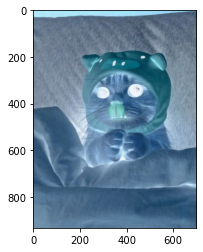

In [208]:
ProcImage.negative(gatito).show()

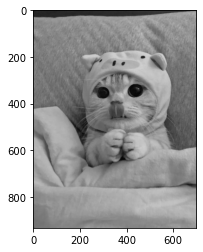

In [209]:
ProcImage.img2gray(gatito).show()

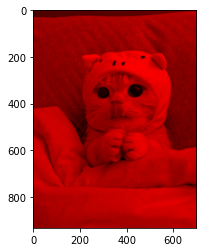

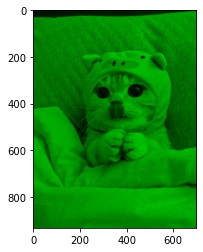

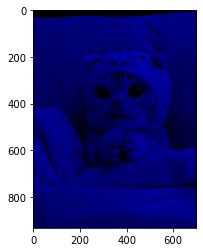

In [210]:
ProcImage.img2RGB(gatito, "r").show()
ProcImage.img2RGB(gatito, "g").show()
ProcImage.img2RGB(gatito, "b").show()

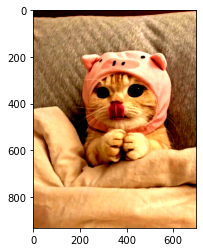

In [243]:
ProcImage.img2contrast(gatito, 100).show()

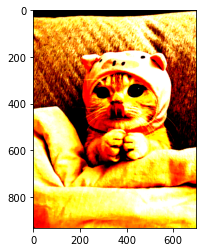

In [242]:
ProcImage.img2contrast(gatito, 200).show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


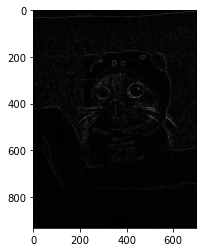

In [246]:
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

ProcImage.conv_channel(gatito, kernel).show()


### 2.4 Probar [0,5 puntos]

**Respuesta Esperada**:

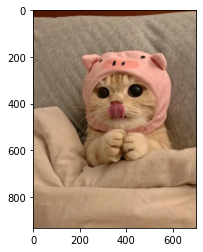

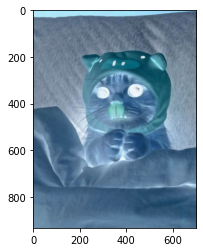

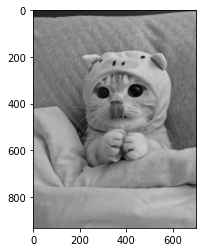

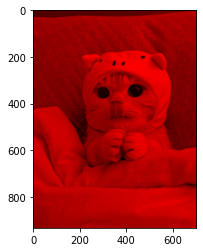

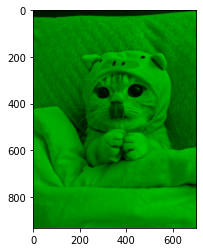

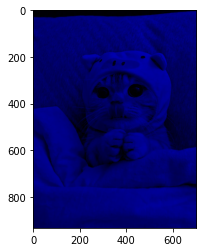

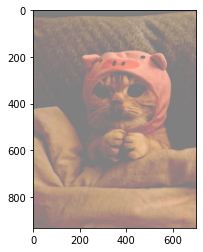

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


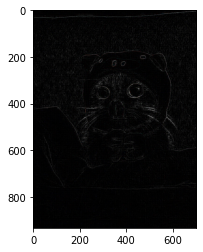

In [ ]:
gatito = Imagen(images["gatitos"][1])

gatito.show()

ProcImage.negative(gatito).show()

ProcImage.img2gray(gatito).show()

ProcImage.img2RGB(gatito, "r").show()
ProcImage.img2RGB(gatito, "g").show()
ProcImage.img2RGB(gatito, "b").show()


ProcImage.img2contrast(gatito, 0).show()

# Convolución
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

ProcImage.conv_channel(gatito, kernel).show()



**Comente:**

```
Escriba aquí su justificación
```

#### Implementar 5 Kernels y probarlos con las imagenes

Referencia: 
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [ ]:
# Convolución
kernel_1 = np.array([...])
kernel_2 = ...
kernel_3 = ...
kernel_4 = ...
kernel_5 = ...

ProcImage.conv_channel(gatito, kernel_1).show()

**Hasta aquí llega la tarea. Lo siguiente es solo bonus**

---

## 3. Secuencias y Detección de Movimiento - [Bonus - 1 punto]

**Nota:** De aquí hacia adelante puedes obtener **1 Punto** para la evaluación de esta tarea 😱😱😱.

### 3.1 Clase Secuencia de imágenes
Implemente la Clase SecuenciaImagenes() para cargar conjuntos de imágenes secuenciales. Para esto la clase deberá cumplir los siguientes requisitos:

- [ ] Crear el constructor que inicializará el objeto SecuenciaImagenes.
- [ ] Un property que maneje self.data y que permita la modificación vía setter solo en caso de que la secuencia de imágenes sea válida (usando las mismas comprobaciones del constructor).
- [ ] Implementar el método `.show(id)` para mostrar la imagen ubicada en la posición dada por el argumento.
- [ ] Implemente el método `.show_animation()` para mostrar la secuencia en movimiento.



In [ ]:
path = './secuencia_plaza/'
img_names = os.listdir(path)

imagenes = np.array(list(map(lambda img: np.array(Image.open(path+img)), img_names)))

In [ ]:
class SecuenciaImagenes:
    def __init__(self, imgs):
        pass

    @property
    def sec(self):
        pass

    @sec.setter
    def sec(self, imagen):
        pass

    def show(self, id):
        pass

    def show_animation():
        # Referencias:
        # https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
        pass

**Resultados esperados:**

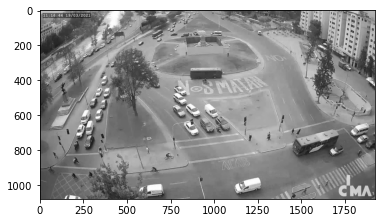

In [ ]:
plaza = SecuenciaImagenes(imagenes)
plazaBW.show(1)

### 3.2. Secuencia de Imagenes


A continuación, deben programar una función que nos permite resaltar los objetos en movimientos de una secuencia de imágenes. Para esta parte del laboratorio, deberá utilizar las imágenes dispuestas en la carpeta "secuencia_plaza" del archivo zip subido a material docente. 

Primero que todo, cargue la secuencia de imágenes que se encuentran en el directorio. Para esto, se recomienda utilizar el comando "os.listdir(dir)", ya que este le facilitará la carga de un gran número de imágenes (pruebe el comando y vea que sucede).



![plaza se mueve](https://media0.giphy.com/media/ZAzlopoHETs5lZQ6EZ/giphy.gif "plaza")

Para realizar este ejercicio utilizaremos un método super básico para la eliminación de fondo. Para esto sigue la siguiente receta:
 1. Pase a escala de grises todas las imágenes secuenciales.
 2. Almacene en una variable la resta de las imágenes consecutivas.

   $$ imagen\_out = imagen(t) - imagen(t+1) $$

 3. Establezca un umbral para eliminar algunos artefactos. Pruebe con al menos 3 umbrales.

$$ imagen\_out = imagen\_out> Umbral $$

**Nota**: No es necesario que construya una clase para esta parte.

In [ ]:
def dect_mov(sec_img, umbral=30):
    pass

### 3.3 Resultado

Ahora es tiempo de relajarse y ver si nuestro experimento logra resaltar los objetos en movimiento de esta polémica Plaza, para esto solo ejecute el siguiente Código y espere. 

In [ ]:
imageio.mimsave('plaza.gif', dect_mov(plaza))

**Ejemplo de resultado esperado:**

![resultados](https://media3.giphy.com/media/SKV3bgUzHt0MLJTWW2/giphy.gif "res")

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.giphy.com/media/5xtDaroSIXzLa6dvfI4/giphy.gif "cerati")


### Referencias lab 1.

- http://www.cs.cornell.edu/cv/SummerSchool/Introduction.pdf
- https://en.wikipedia.org/wiki/Tensor
- https://support.ptc.com/help/mathcad/es/index.html#page/PTC_Mathcad_Help/example_grayscale_and_color_in_images.html
- http://w3.unpocodetodo.info/canvas/negativo.php
- http://www.dfstudios.co.uk/articles/programming/image-programming-algorithms/image-processing-algorithms-part-5-contrast-adjustment/

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>